<a href="https://colab.research.google.com/github/Kpantigere/Batch_Fall_23_DataA_nalytics/blob/main/Copy_of_Data_Cleaning_Basics_(ReDI_23_Fall)_UMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

This notebook is supposed to be used together with the accompanying [Google slides](https://docs.google.com/presentation/d/183XYOS0UmTWVcq_Y1fFS0CBNS1ua3lCjFgWVSJrnVS4/edit#slide=id.g2862a12327a_0_954). The examples here demonstrate how the techniques can be applied to a simple dataset.

In [97]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

## Load Dataset
(For the purpose of the exercise, run the cell without unhiding it)

In [47]:
# Load dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Eva'],
    'Age': ['25', np.nan, '22', np.nan, '28', '26'],
    'Gender': ['F', 'M', 'M', 'Male', 'Female', 'F'],
    'Salary': ['50,000', '3.000', '55000', '70,000', '48.000', '48000'],
    'JoiningDate': ['2021-05-15', '2022-01-10', '2020-11-20', '2023-03-05', '2019-09-12', '2019-09-12'],
    'Bonus': ['20%', '10%', '20%', '10%', '10%', '10%'],
    'LastYearSalary': [45000, 2500, 50000, 70000, 48000, 48000]
}

df = pd.DataFrame(data)

## Data Inspection

In [ ]:
# Gather some information about the DataFrame
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isna()

In [ ]:
df.value_counts()

In [ ]:
df.columns

In [ ]:
df[~df.duplicated(subset=['Name'])]['Name']

In [ ]:
# Show the first 6 rows of the dataframe
df.head(6)

In [ ]:
# What are the unique names?
df.nunique()

## Visualisation

In [31]:
import matplotlib.pyplot as plt

In [ ]:
# Plot a histogram of the salary
plt.figure(figsize=(5,2.5))
plt.hist(df['Salary'].dropna(),bins=3)


In [ ]:
# Plot a bar chart of the genders
df['Gender'].value_counts().plot(kind='bar')

## Data formats

In [70]:
# Convert columns ('JoiningDate') to a datetime
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])

In [71]:
# Check data types
df.dtypes

Name                      object
Age                       object
Gender                    object
Salary                    object
JoiningDate       datetime64[ns]
Bonus                     object
LastYearSalary             int64
dtype: object

In [72]:
# Convert columns ('Age') to a numeric field
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [ ]:
# Check data types
df.dtypes

In [74]:
# Convert columns ('Bonus') to a proper float using rstrip
df['Bonus'] = df['Bonus'].str.rstrip('%').astype(float)

In [ ]:
# Check data types
df.dtypes

In [76]:
# Convert columns ('Salary') to a proper int using replace regex
df['Salary'] = df['Salary'].str.replace('[,.]','',regex= True).astype(int)

In [ ]:
# Check data types
df.dtypes

## Missing Values

In [ ]:
# Which columns have missing values? How many?
df.isnull().sum()

In [ ]:
# Show which colmuns rows missing values.
df[df['Age'].isnull()]

In [88]:
# Fill the missing values with the mode.
mode = df['Age'].mode()[0]

In [89]:
df['Age'].fillna(mode, inplace=True)

In [ ]:
# View the dataframe again.
df

## Drop Duplicates

In [ ]:
# Show which are the duplicated rows
# (Note: only check for duplicates based on the name)
df[df.duplicated(subset=['Name'],keep=False)]

In [ ]:
# When there are duplicates, only keep the first row
df[~df.duplicated(subset=['Name'], keep='first')]

In [ ]:
# Display the dataframe again
df

## Outliers

Note: z-score is defined:
$$
z = \frac{x - \mu}{\sigma}
$$


In [98]:
# Calculate the z-score of each of the Salary values
df['zscore'] = zscore(df['Salary'])

In [113]:
df_mean = df['Salary'].mean()
df_std_dev = df['Salary'].std()
df['Z_score1'] = (df['Salary']-df_mean)/df_std_dev

In [ ]:
df.drop(labels='is_outlier', axis=1)

In [124]:
# Define a function which returns true if the value is an outlier
def is_outlinier(z, threshold=1):
  return abs(z) > threshold


In [125]:
df_mean = df['Salary'].mean()
df_std_dev = df['Salary'].std()
df['Z_score1'] = (df['Salary']-df_mean)/df_std_dev

In [121]:
#df['zscore'] = zscore(df['Salary'])
#df['is_outlier'] = df['zscore'].apply(is_outlinier)

In [ ]:

df

## Data validation

In [ ]:
# Using the .apply() method,
# Define another function to deal with the outliers in Salary
df['is_outlier'] = df['Z_score1'].apply(is_outlinier)

In [ ]:
# View the dataframe again

In [130]:
# Using the .map() method,
df['Gender']
# Fix the gender column
Gender_Map = {'M':'Male','m':'Male','Male':'Male','MALE':'Male', 'f':'Female', 'F':'Female'}


In [131]:
df['Gender'] = df['Gender'].map(Gender_Map)

In [ ]:
# View the dataframe again
df = df[~df.duplicated(subset=['Name'],keep='first')]
df

In [ ]:
# Use .describe() again
df.describe()

In [ ]:
# Plot the histogram /bar charts of the other fields
plt.figure(figsize=(5,2.5))
plt.hist(df['Salary'].dropna(),bins=3)


In [ ]:
df['Salary'].value_counts().plot(kind='bar')

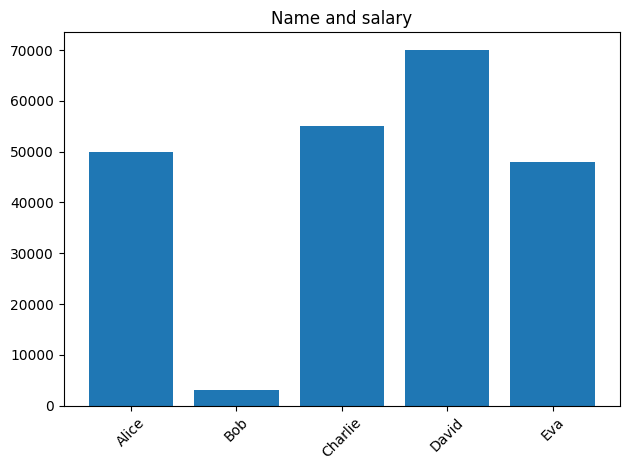

In [153]:
plt.bar(df['Name'], df['Salary'])
#plt.xlabel('Name')
#plt.ylabel('Salary')
plt.title('Name and salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()